# Assignment 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [4]:
#Data reading
df = pd.read_csv('protein-angle-dataset.csv')

#  1. Show the distribution of phi and psi combinations using:
(a) a scatter plot
(b) a 2D histogram
Make sure the plots are nice and clean. Can you modify them for better visualization? Hint:
consider what would happen if you shift the range of the x- or y-axis on your plots.


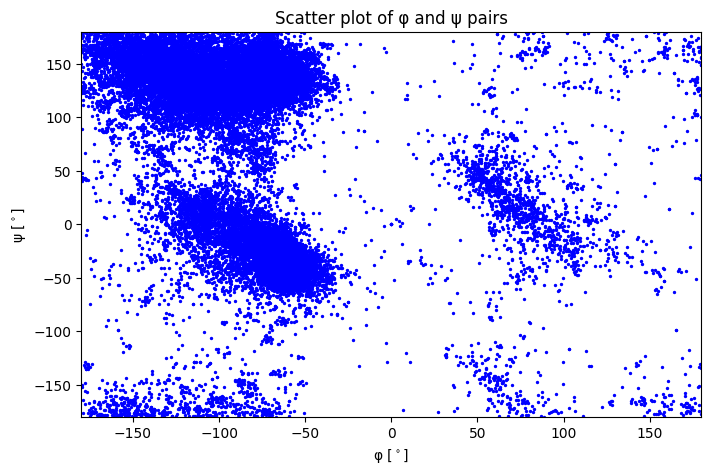

In [ ]:
# (a) Scatter plot

plt.figure(figsize=(8,5))
plt.scatter(df['phi'], df['psi'], s=2, c='b')

plt.title('Scatter plot of \u03C6 and \u03C8 pairs')
#limits the plot since we don't have data outside of this intervals
plt.xlim(-180,180)
plt.ylim(-180,180)

plt.xlabel('\u03C6 [$^\circ$]')
plt.ylabel('\u03C8 [$^\circ$]')
plt.show()

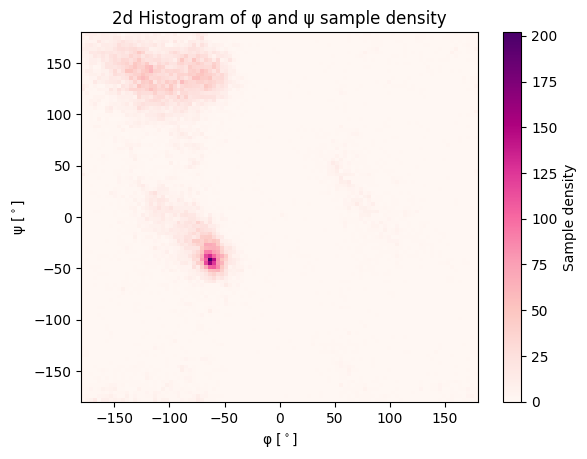

In [ ]:
#b) 2D histogram = Heatmap

plt.hist2d(df['phi'], df['psi'], bins=100, cmap='RdPu')

tag = plt.colorbar()
tag.set_label('Sample density')

plt.xlabel('\u03C6 [$^\circ$]')
plt.ylabel('\u03C8 [$^\circ$]')
plt.title('2d Histogram of \u03C6 and \u03C8 sample density')
plt.show()

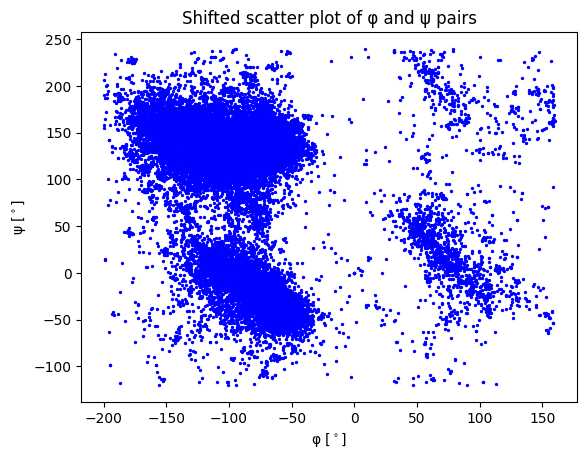

In [ ]:
# Can you modify for better visualization?
# The phi-angles should range from -200 to 160 and the psi-angles from -120 to 240.

X = df['phi']
Y = df['psi']

X_shift = (X + 200) % 360 - 200
Y_shift = (Y + 120) % 360 - 120

plt.scatter(X_shift,Y_shift, c = 'b', s=2)
plt.title('Shifted scatter plot of \u03C6 and \u03C8 pairs')

plt.xlabel('\u03C6 [$^\circ$]')
plt.ylabel('\u03C8 [$^\circ$]')
plt.show()

#  2. Use the k-means clustering method to cluster the phi and psi angle combinations in the data file.
### (a)
Experiment with different values of k. Suggest an appropriate value of k for this task and
motivate this choice.


In [ ]:
# (a)

plt.figure(figsize=(15,15))

n_init = 10 # Number of times the K-mean algorithm will run with different centroid seeds.
silhuette_scores = []

# Perform K-means clustering for k = 2,3,...10, and plot the results in a 3x3 grid.
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = n_init, random_state=0).fit(df[['phi', 'psi']])
    silhuette_scores.append(silhouette_score(df[['phi', 'psi']], kmeans.labels_))
    plt.subplot(3,3,k-1)
    plt.scatter(df['phi'], df['psi'], s=2, c=kmeans.labels_)
    plt.title('k = ' + str(k))
    plt.xlim(-180,180)
    plt.ylim(-180,180)
    plt.xlabel('\u03C6')
    plt.ylabel('\u03C8')

plt.suptitle('Comparison of clusterings using k-means clustering with varying k')
plt.tight_layout()
plt.show()

plt.plot(range(2,11), silhuette_scores)
plt.title('Silhouette scores for different values of k in k-means clustering')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

### (b)
Do the clusters found in part (a) seem reasonable?

Answer: For k=3 and k=4, yes, if you ignore the fact that the toroidal property is ignored.

### (c)
(optional question, if you are interested and have the time) The top edge of a Ramachandran plot wraps round to the bottom edge, and the right edge wraps around to the left edge (we can think of the 2D Ramachandran plot being mapped onto the surface of a torus). Ideally, this should be considered when clustering the data points on a Ramachandran plot. Repeat questions (a) and (b) taking this into account.

In [ ]:
# (c)

# Convert angles to radians to use in trigonometric functions
df['phi_rad'] = np.deg2rad(df['phi'])
df['psi_rad'] = np.deg2rad(df['psi'])

# Convert angles to points on the unit circle
df['phi_cos'] = np.cos(df['phi_rad'])
df['phi_sin'] = np.sin(df['phi_rad'])
df['psi_cos'] = np.cos(df['psi_rad'])
df['psi_sin'] = np.sin(df['psi_rad'])

plt.figure(figsize=(15,15))

n_init = 10 # Number of times the K-mean algorithm will run with different centroid seeds.
silhuette_scores = []

# Perform K-means clustering for k = 2,3,...10, and plot the results in a 3x3 grid.
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = n_init, random_state=0).fit(df[['phi_cos', 'phi_sin', 'psi_cos', 'psi_sin']])
    silhuette_scores.append(silhouette_score(df[['phi_cos', 'phi_sin', 'psi_cos', 'psi_sin']], kmeans.labels_))
    plt.subplot(3,3,k-1)
    plt.scatter(df['phi'], df['psi'], s=2, c=kmeans.labels_)
    plt.title('k = ' + str(k))
    plt.xlim(-180,180)
    plt.ylim(-180,180)
    plt.xlabel('\u03C6')
    plt.ylabel('\u03C8')

plt.suptitle('Comparison of clusterings with varying k using k-means clustering on the sin and cos of the angles')
plt.tight_layout()
plt.show()

plt.plot(range(2,11), silhuette_scores)
plt.title('Silhouette scores for different values of k, with k-means clustering on the sin and cos of the angles')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

# 3. Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.






Estimated number of clusters: 3
Estimated number of noise points: 1543


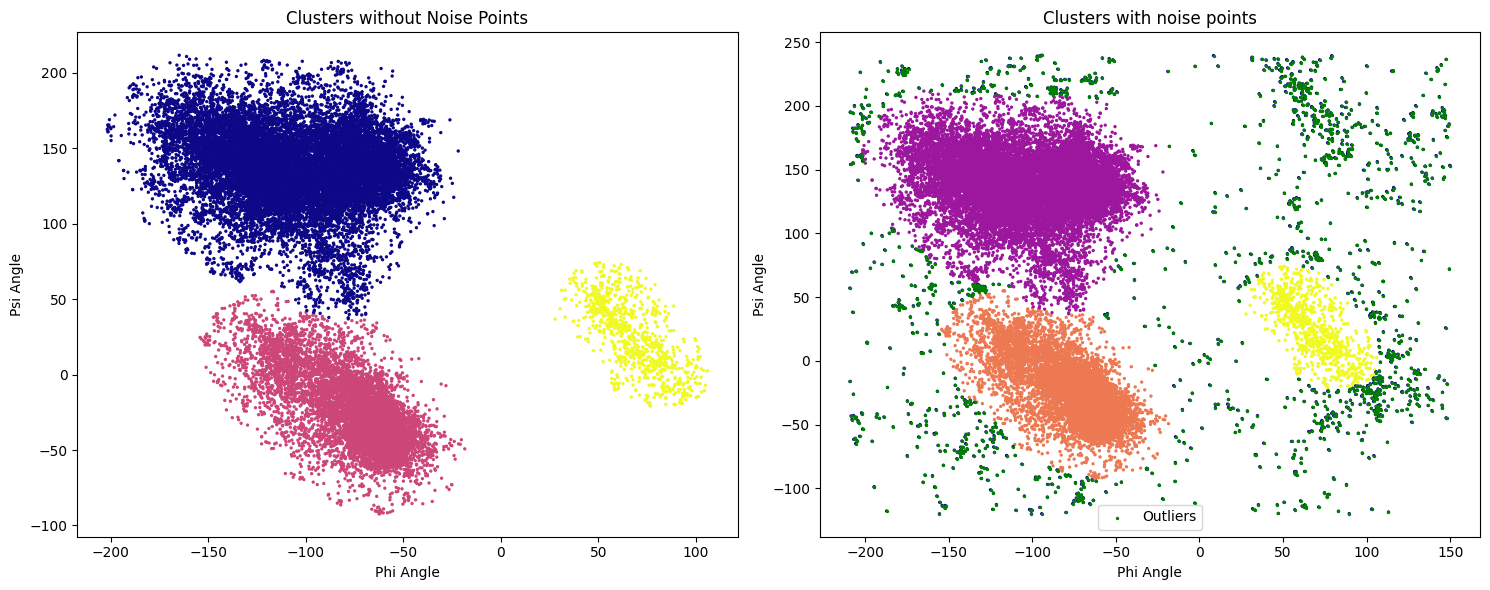

min_samples: 50
Estimated number of clusters: 3
Estimated number of noise points: 474
min_samples: 100
Estimated number of clusters: 2
Estimated number of noise points: 1042
min_samples: 150
Estimated number of clusters: 2
Estimated number of noise points: 1250
min_samples: 200
Estimated number of clusters: 3
Estimated number of noise points: 1543
min_samples: 250
Estimated number of clusters: 3
Estimated number of noise points: 1839
min_samples: 300
Estimated number of clusters: 2
Estimated number of noise points: 2761
min_samples: 350
Estimated number of clusters: 2
Estimated number of noise points: 2986
min_samples: 400
Estimated number of clusters: 2
Estimated number of noise points: 3150
min_samples: 450
Estimated number of clusters: 2
Estimated number of noise points: 3300


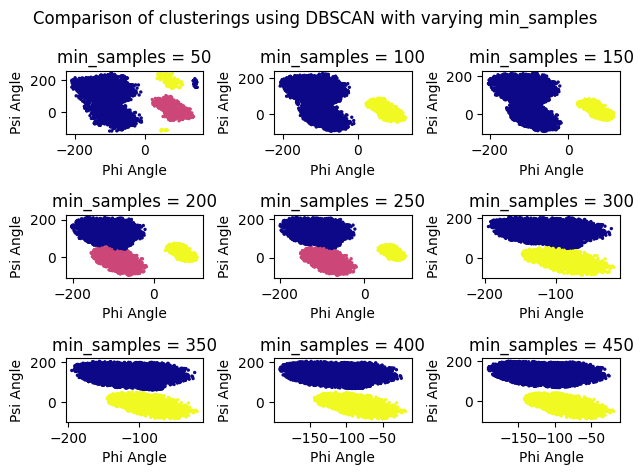

In [7]:
# Choicing min_samples and eps
min_samples = 200
eps = 0.3

# For shting the axes to better visualize the clusters
X = df['phi']
Y = df['psi']

X_shift = (X + 210) % 360 - 210
Y_shift = (Y + 120) % 360 - 120

# Extracting phi and psi
angles = np.array(df[['phi', 'psi']])
angles[:, 0] = X_shift
angles[:, 1] = Y_shift

# To adhere to the toroidal property, perform clustering on the sin and cos of the angles
# Convert angles to radians to use in trigonometric functions
df['phi_rad'] = np.deg2rad(df['phi'])
df['psi_rad'] = np.deg2rad(df['psi'])

# Convert angles to points on the unit circle
df['phi_cos'] = np.cos(df['phi_rad'])
df['phi_sin'] = np.sin(df['phi_rad'])
df['psi_cos'] = np.cos(df['psi_rad'])
df['psi_sin'] = np.sin(df['psi_rad'])

# Using DBSCAN for clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(df[['phi_cos', 'phi_sin', 'psi_cos', 'psi_sin']])

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Printing the results
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Visualizing the clusters without noise points
plt.figure(figsize=(15, 6))

# Plotting clusters in plasma colormap (exclude noise points)
plt.subplot(1, 2, 1)
plt.scatter(angles[labels != -1, 0], angles[labels != -1, 1], c=labels[labels != -1], cmap='plasma', marker='o', s=2)
plt.title('Clusters without Noise Points')
plt.xlabel('Phi Angle')
plt.ylabel('Psi Angle')

# Highlighting outliers
outliers_mask = labels == -1
outliers = angles[outliers_mask]

# Plotting clusters with outliers highlighted in green
plt.subplot(1, 2, 2)
scatter = plt.scatter(angles[:, 0], angles[:, 1], c=labels, cmap='plasma', marker='o', s=2)
plt.scatter(outliers[:, 0], outliers[:, 1], c='green', marker='o', s=2, label='Outliers')
plt.title('Clusters with noise points')
plt.xlabel('Phi Angle')
plt.ylabel('Psi Angle')
plt.legend()

plt.tight_layout()
plt.show()

for min_samples in range(50, 500, 50):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df[['phi_cos', 'phi_sin', 'psi_cos', 'psi_sin']])
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('min_samples: %d' % min_samples)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)

    plt.subplot(3,3,min_samples//50)
    plt.scatter(angles[labels != -1, 0], angles[labels != -1, 1], c=labels[labels != -1], cmap='plasma', marker='o', s=2)
    plt.title('min_samples = ' + str(min_samples))
    plt.xlabel('Phi Angle')
    plt.ylabel('Psi Angle')

plt.suptitle('Comparison of clusterings using DBSCAN with varying min_samples')
plt.tight_layout()
plt.show()

(a) Motivate the choice of:
1.   The minimum number of samples in the neighborhood for a point to be considered as a
core point, and (seen in report)


(a) 2.   the maximum distance between two samples belonging to the same neighborhood (“eps” or “epsilon”).

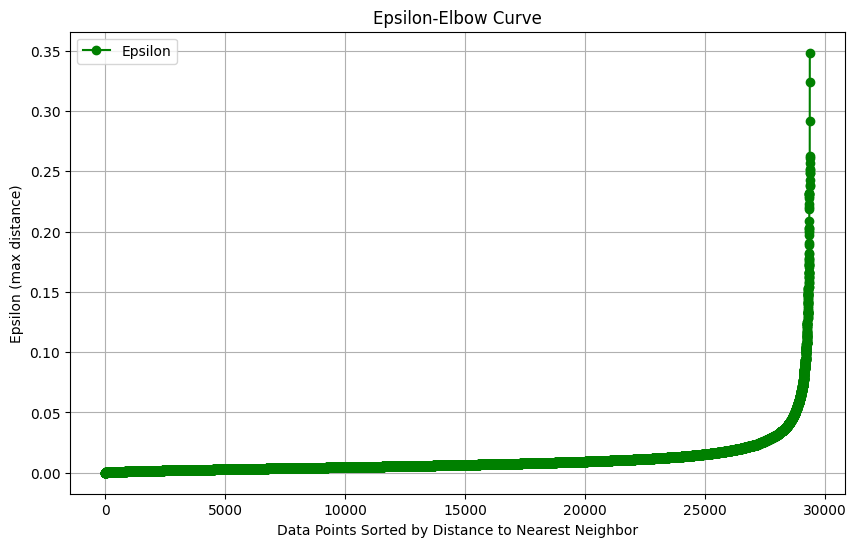

In [ ]:
# For shting the axes to better visualize the clusters
X = df['phi']
Y = df['psi']

X_shift = (X + 210) % 360 - 210
Y_shift = (Y + 120) % 360 - 120

# Extracting phi and psi
angles = np.array(df[['phi', 'psi']])
angles[:, 0] = X_shift
angles[:, 1] = Y_shift

# Choicing min_samples and eps
min_samples = 200
eps = 0.3

# To adhere to the toroidal property, perform clustering on the sin and cos of the angles
# Convert angles to radians to use in trigonometric functions
df['phi_rad'] = np.deg2rad(df['phi'])
df['psi_rad'] = np.deg2rad(df['psi'])

# Convert angles to points on the unit circle
df['phi_cos'] = np.cos(df['phi_rad'])
df['phi_sin'] = np.sin(df['phi_rad'])
df['psi_cos'] = np.cos(df['psi_rad'])
df['psi_sin'] = np.sin(df['psi_rad'])

# Using Nearest Neighbors to calculate distances
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(df[['phi_cos', 'phi_sin', 'psi_cos', 'psi_sin']])
distances, _ = nearest_neighbors.kneighbors(df[['phi_cos', 'phi_sin', 'psi_cos', 'psi_sin']])
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plotting the Epsilon-Elbow curve
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(distances, marker='o', linestyle='-', color='g', label='Epsilon')
plt.title('Epsilon-Elbow Curve')
plt.xlabel('Data Points Sorted by Distance to Nearest Neighbor')
plt.ylabel('Epsilon (max distance)')
plt.grid(True)  # Add a grid
plt.legend()  # Add a legend
plt.show()



##  Compare the clusters found by DBSCAN with those found using k-means.

K-Means Clustering Results:
Number of clusters: 3
Silhouette Score for K-Means: 0.58


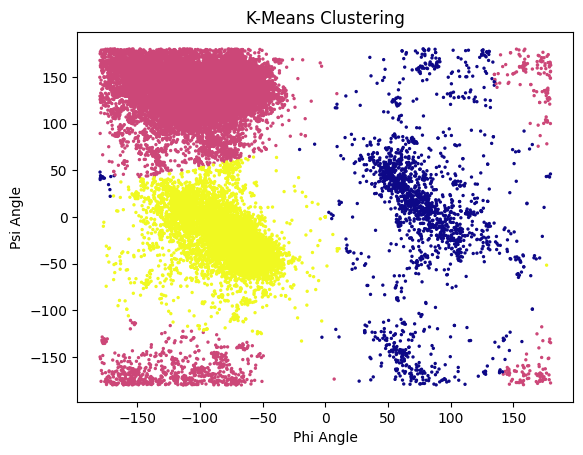

In [ ]:
# Convert angles to radians to use in trigonometric functions
df['phi_rad'] = np.deg2rad(df['phi'])
df['psi_rad'] = np.deg2rad(df['psi'])

# Convert angles to points on the unit circle
df['phi_cos'] = np.cos(df['phi_rad'])
df['phi_sin'] = np.sin(df['phi_rad'])
df['psi_cos'] = np.cos(df['psi_rad'])
df['psi_sin'] = np.sin(df['psi_rad'])


# Extracting phi and psi
angles = df[['phi', 'psi']].values

n_clusters = 3 # Number of clusters. It is set to 3 since it yields the highest silhouette score.

# Applying K-means with a specific number of clusters
kmeans = KMeans(n_clusters=n_clusters, n_init = n_clusters, random_state=0).fit(df[['phi_cos', 'phi_sin', 'psi_cos', 'psi_sin']])

# Evaluating clustering performance using silhouette score for k-means
silhouette = silhouette_score(df[['phi_cos', 'phi_sin', 'psi_cos', 'psi_sin']], kmeans.labels_)

# Printing the results
print('K-Means Clustering Results:')
print('Number of clusters: %d' % n_clusters)
print('Silhouette Score for K-Means: {:.2f}'.format(silhouette))

# Visualizing the K-means clusters
plt.scatter(angles[:, 0], angles[:, 1], c=kmeans.labels_, cmap='plasma', marker='o', s=2)
plt.title('K-Means Clustering')
plt.xlabel('Phi Angle')
plt.ylabel('Psi Angle')
plt.show()

(b) Highlight the clusters found using DBSCAN and any outliers in a scatter plot.

Estimated number of clusters: 3
Estimated number of noise points: 1543


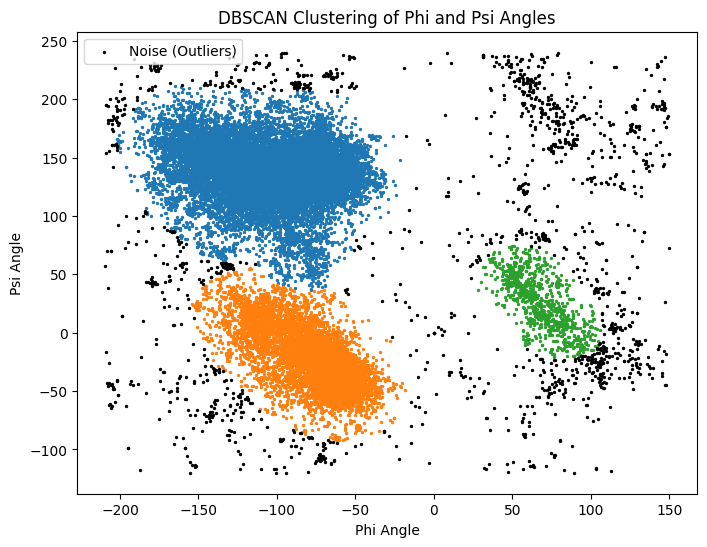

In [ ]:
# For shting the axes to better visualize the clusters
X = df['phi']
Y = df['psi']

X_shift = (X + 210) % 360 - 210
Y_shift = (Y + 120) % 360 - 120

# Extracting phi and psi
angles = np.array(df[['phi', 'psi']])
angles[:, 0] = X_shift
angles[:, 1] = Y_shift

# Choicing min_samples and eps
min_samples = 200
eps = 0.3

# To adhere to the toroidal property, perform clustering on the sin and cos of the angles
# Convert angles to radians to use in trigonometric functions
df['phi_rad'] = np.deg2rad(df['phi'])
df['psi_rad'] = np.deg2rad(df['psi'])

# Convert angles to points on the unit circle
df['phi_cos'] = np.cos(df['phi_rad'])
df['phi_sin'] = np.sin(df['phi_rad'])
df['psi_cos'] = np.cos(df['psi_rad'])
df['psi_sin'] = np.sin(df['psi_rad'])

# Using DBSCAN for clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(df[['phi_cos', 'phi_sin', 'psi_cos', 'psi_sin']])

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Printing the results
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Visualizing the clusters and outliers
plt.figure(figsize=(8, 6))

# Plotting the clusters
for cluster_label in set(labels):
    if cluster_label == -1:
        continue  # Skip noise points
    cluster_points = angles[labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=2)

noise_points = angles[labels == -1]
plt.scatter(noise_points[:, 0], noise_points[:, 1], label='Noise (Outliers)', color='black', s=2)

plt.title('DBSCAN Clustering of Phi and Psi Angles')
plt.xlabel('Phi Angle')
plt.ylabel('Psi Angle')
plt.legend()
plt.show()

(c) How many outliers are found? Plot a bar chart to show how often each of the amino acid residue types are outliers.

Total number of outliers: 1543
Number of outliers for each amino acid type:
GLY: 760
ALA: 66
ASP: 71
GLU: 72
VAL: 45
HIS: 41
LYS: 43
ASN: 99
LEU: 31
MET: 9
SER: 107
ILE: 16
PRO: 13
THR: 31
TYR: 32
GLN: 33
ARG: 35
CYS: 7
PHE: 24
TRP: 8


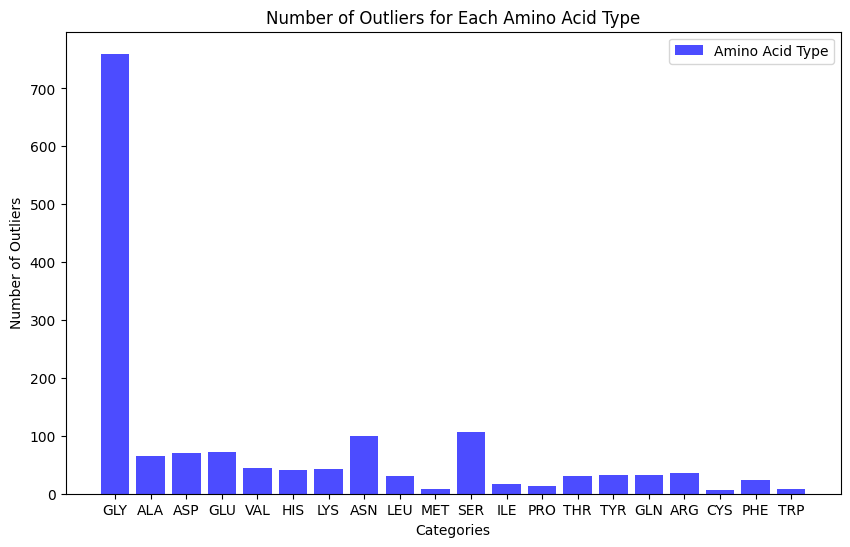

In [ ]:
# For shting the axes to better visualize the clusters
X = df['phi']
Y = df['psi']

X_shift = (X + 210) % 360 - 210
Y_shift = (Y + 120) % 360 - 120

# Extracting phi and psi
angles = np.array(df[['phi', 'psi']])
angles[:, 0] = X_shift
angles[:, 1] = Y_shift

# Choicing min_samples and eps
min_samples = 200
eps = 0.3

# To adhere to the toroidal property, perform clustering on the sin and cos of the angles
# Convert angles to radians to use in trigonometric functions
df['phi_rad'] = np.deg2rad(df['phi'])
df['psi_rad'] = np.deg2rad(df['psi'])

# Convert angles to points on the unit circle
df['phi_cos'] = np.cos(df['phi_rad'])
df['phi_sin'] = np.sin(df['phi_rad'])
df['psi_cos'] = np.cos(df['psi_rad'])
df['psi_sin'] = np.sin(df['psi_rad'])

# Using DBSCAN for clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(df[['phi_cos', 'phi_sin', 'psi_cos', 'psi_sin']])

# Counting the number of outliers for each amino acid type
outliers_count = {}

for aa_type, label in zip(amino_acid_type, labels):
    if label == -1:  # Outlier
        if aa_type in outliers_count:
            outliers_count[aa_type] += 1
        else:
            outliers_count[aa_type] = 1

# Printing the total number of outliers
total_outliers = sum(outliers_count.values())
print('Total number of outliers:', total_outliers)

# Printing the number of outliers for each amino acid type
print('Number of outliers for each amino acid type:')
for aa_type, count in outliers_count.items():
    print(f'{aa_type}: {count}')

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Plotting outliers for each amino acid type
plt.bar(outliers_count.keys(), outliers_count.values(), color='blue', alpha=0.7, label='Amino Acid Type')

plt.title('Number of Outliers for Each Amino Acid Type')
plt.xlabel('Categories')
plt.ylabel('Number of Outliers')
plt.legend()
plt.show()



# 4.
The data file can be stratified by amino acid residue type. Use DBSCAN to cluster the data that have residue type PRO. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3). Note: the parameters might have to be adjusted from those used in question 3

In [ ]:
#Curve to decide PRO-epsilon

#Data cleaning, getting only psi and phi for PRO labeled data
pro = df[df["residue name"] == "PRO"]
pro_sorted = pro.loc[:, ["psi", "phi"]].values.reshape(-1, 2)

min_pt = 25 #Trial and error gave us a good value

# Use Nearest Neighbors to calculate distances
n_nbr = NearestNeighbors(n_neighbors=min_pt).fit(pro_sorted)
distances, _ = n_nbr.kneighbors(pro_sorted)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot the Epsilon-Elbow curve
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(distances, marker='o', linestyle='-', color='g', label='Epsilon')
plt.xlim(1450, 1600)
plt.ylim(0, 50)
plt.title('Epsilon-Elbow Curve')
plt.xlabel('Data Points Sorted by Distance to Nearest Neighbor')
plt.ylabel('Epsilon (max distance)')
plt.grid(True)  # Add a grid
plt.legend()  # Add a legend
plt.show()

In [ ]:
#Data cleaning, getting only Phi/Psi data for PRO labeled data.
pro = df[df["residue name"] == "PRO"]
pro_sorted = pro.loc[:, ["psi", "phi"]].values.reshape(-1, 2)

epsilon = 16  # From epsilon-diagram
min_samples = 20 #Trial and error


dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(pro_sorted)


# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

# Print the results of estimations
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot points based on their cluster assignment
plt.scatter(pro_sorted[:, 1], pro_sorted[:, 0], c=clusters, cmap='viridis', s=2)

# Add labels and title
plt.xlabel('\u03C6 [$^\circ$]')
plt.ylabel('\u03C8 [$^\circ$]')
plt.title("DBSCAN Clustering of PRO Residues")

# Show the plot
plt.show()